In [1]:
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# creating list of all csv we have 
path_csv = 'csv_stock/'
all_csv = [f for f in listdir(path_csv) if isfile(join(path_csv, f))]
all_csv.sort()
print("We have total",len(all_csv)-1,"csv files")

We have total 5 csv files


In [3]:
# this function loads the csv files and extract 'index' and 'close' column and turn them into numpy array
def get_time_series_list_company_wise(all_csv):
    all_csv_list = list()
    for each_csv in all_csv:
        if each_csv.endswith('.csv'):
            each_csv_list = list()
            print(each_csv)
            data = pd.read_csv('csv_stock/{}'.format(each_csv))
            df_time = data[['index']]
            df_series = data[['Close']]
            time = df_time.to_numpy()
            series = df_series.to_numpy()
            each_csv_list.append(time)
            each_csv_list.append(series)
            print(len(each_csv_list))
            all_csv_list.append(each_csv_list)
    return all_csv_list

In [4]:
list_ts = get_time_series_list_company_wise(all_csv) 

aapl.csv
2
amzn.csv
2
fb.csv
2
googl.csv
2
msft.csv
2


In [5]:
time = list_ts[0][0]
series = list_ts[0][1]

print(series.shape)

(8364, 1)


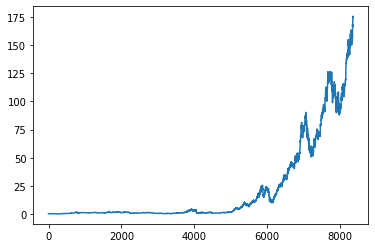

In [6]:
plt.plot(time,series)

In [7]:
# split into training and validation
split = 7390
time_train = time[4000:split]
time_val = time[split:]
series_train = series[4000:split]
series_val = series[split:]

print("Time Train: ", time_train.shape)
print("Series Train: ", series_train.shape)
print("Time Validation: ", time_val.shape)
print("Series Validation: ", series_val.shape)

Time Train:  (3390, 1)
Series Train:  (3390, 1)
Time Validation:  (974, 1)
Series Validation:  (974, 1)


In [22]:
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000



def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [9]:
# finding the best Learning Rate (lr)

# tf.keras.backend.clear_session()
# tf.random.set_seed(51)
# np.random.seed(51)

# tf.keras.backend.clear_session()
# dataset = windowed_dataset(series_train, window_size, batch_size, shuffle_buffer_size)

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mae"])

# history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

In [10]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([1e-8, 1e-4, 0, 30])

In [32]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
tf.keras.backend.clear_session()


shuffle_buffer_size = 1000

dataset = windowed_dataset(series_train, window_size = 30, batch_size = 28, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40, return_sequences=True)),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9),metrics=["mae"])

history = model.fit(dataset,epochs=150)

Epoch 1/150
120/120 [==============================] - 4s 30ms/step - loss: 50.3049 - mae: 4.9173
Epoch 2/150
120/120 [==============================] - 3s 28ms/step - loss: 4.6644 - mae: 1.4158
Epoch 3/150
120/120 [==============================] - 4s 29ms/step - loss: 3.6784 - mae: 1.1494
Epoch 4/150
120/120 [==============================] - 3s 28ms/step - loss: 3.1764 - mae: 1.1324
Epoch 5/150
120/120 [==============================] - 4s 29ms/step - loss: 3.3757 - mae: 1.1865
Epoch 6/150
120/120 [==============================] - 3s 28ms/step - loss: 2.6602 - mae: 0.9959
Epoch 7/150
120/120 [==============================] - 3s 28ms/step - loss: 2.7983 - mae: 1.0234
Epoch 8/150
120/120 [==============================] - 4s 33ms/step - loss: 2.7110 - mae: 1.0432
Epoch 9/150
120/120 [==============================] - 3s 27ms/step - loss: 2.3284 - mae: 0.9095
Epoch 10/150
120/120 [==============================] - 3s 29ms/step - loss: 2.2997 - mae: 0.9025
Epoch 11/150
120/120 [======

120/120 [==============================] - 3s 29ms/step - loss: 0.8992 - mae: 0.5804
Epoch 85/150
120/120 [==============================] - 3s 26ms/step - loss: 0.8181 - mae: 0.5586
Epoch 86/150
120/120 [==============================] - 3s 28ms/step - loss: 1.0179 - mae: 0.6042
Epoch 87/150
120/120 [==============================] - 3s 26ms/step - loss: 0.8699 - mae: 0.5646
Epoch 88/150
120/120 [==============================] - 3s 28ms/step - loss: 0.8105 - mae: 0.5502
Epoch 89/150
120/120 [==============================] - 3s 28ms/step - loss: 0.8364 - mae: 0.5583
Epoch 90/150
120/120 [==============================] - 3s 29ms/step - loss: 0.8273 - mae: 0.5755
Epoch 91/150
120/120 [==============================] - 4s 30ms/step - loss: 0.9491 - mae: 0.5737
Epoch 92/150
120/120 [==============================] - 3s 27ms/step - loss: 0.8667 - mae: 0.6043
Epoch 93/150
120/120 [==============================] - 3s 29ms/step - loss: 0.7616 - mae: 0.5284: 2s 
Epoch 94/150
120/120 [======

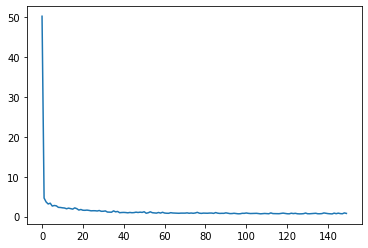

In [33]:
loss=history.history['loss']
epochs=range(len(loss))


loss_zoom = loss[50:]
epochs_zoom = epochs[50:]

plt.plot(epochs,loss)

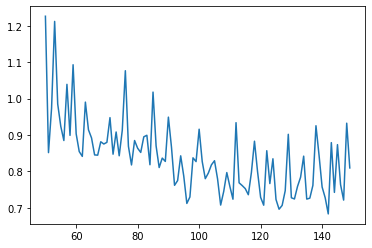

In [34]:
plt.plot(epochs_zoom,loss_zoom)

In [35]:
forecast = []
results = []
for time in range(len(series) - window_size):
    print(time, time + window_size)
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast_val = forecast[split-window_size:]
results_val = np.array(forecast_val)[:, 0, 0]

0 30
1 31
2 32
3 33
4 34
5 35
6 36
7 37
8 38
9 39
10 40
11 41
12 42
13 43
14 44
15 45
16 46
17 47
18 48
19 49
20 50
21 51
22 52
23 53
24 54
25 55
26 56
27 57
28 58
29 59
30 60
31 61
32 62
33 63
34 64
35 65
36 66
37 67
38 68
39 69
40 70
41 71
42 72
43 73
44 74
45 75
46 76
47 77
48 78
49 79
50 80
51 81
52 82
53 83
54 84
55 85
56 86
57 87
58 88
59 89
60 90
61 91
62 92
63 93
64 94
65 95
66 96
67 97
68 98
69 99
70 100
71 101
72 102
73 103
74 104
75 105
76 106
77 107
78 108
79 109
80 110
81 111
82 112
83 113
84 114
85 115
86 116
87 117
88 118
89 119
90 120
91 121
92 122
93 123
94 124
95 125
96 126
97 127
98 128
99 129
100 130
101 131
102 132
103 133
104 134
105 135
106 136
107 137
108 138
109 139
110 140
111 141
112 142
113 143
114 144
115 145
116 146
117 147
118 148
119 149
120 150
121 151
122 152
123 153
124 154
125 155
126 156
127 157
128 158
129 159
130 160
131 161
132 162
133 163
134 164
135 165
136 166
137 167
138 168
139 169
140 170
141 171
142 172
143 173
144 174
145 175
146 176
147 

1039 1069
1040 1070
1041 1071
1042 1072
1043 1073
1044 1074
1045 1075
1046 1076
1047 1077
1048 1078
1049 1079
1050 1080
1051 1081
1052 1082
1053 1083
1054 1084
1055 1085
1056 1086
1057 1087
1058 1088
1059 1089
1060 1090
1061 1091
1062 1092
1063 1093
1064 1094
1065 1095
1066 1096
1067 1097
1068 1098
1069 1099
1070 1100
1071 1101
1072 1102
1073 1103
1074 1104
1075 1105
1076 1106
1077 1107
1078 1108
1079 1109
1080 1110
1081 1111
1082 1112
1083 1113
1084 1114
1085 1115
1086 1116
1087 1117
1088 1118
1089 1119
1090 1120
1091 1121
1092 1122
1093 1123
1094 1124
1095 1125
1096 1126
1097 1127
1098 1128
1099 1129
1100 1130
1101 1131
1102 1132
1103 1133
1104 1134
1105 1135
1106 1136
1107 1137
1108 1138
1109 1139
1110 1140
1111 1141
1112 1142
1113 1143
1114 1144
1115 1145
1116 1146
1117 1147
1118 1148
1119 1149
1120 1150
1121 1151
1122 1152
1123 1153
1124 1154
1125 1155
1126 1156
1127 1157
1128 1158
1129 1159
1130 1160
1131 1161
1132 1162
1133 1163
1134 1164
1135 1165
1136 1166
1137 1167
1138 1168


1859 1889
1860 1890
1861 1891
1862 1892
1863 1893
1864 1894
1865 1895
1866 1896
1867 1897
1868 1898
1869 1899
1870 1900
1871 1901
1872 1902
1873 1903
1874 1904
1875 1905
1876 1906
1877 1907
1878 1908
1879 1909
1880 1910
1881 1911
1882 1912
1883 1913
1884 1914
1885 1915
1886 1916
1887 1917
1888 1918
1889 1919
1890 1920
1891 1921
1892 1922
1893 1923
1894 1924
1895 1925
1896 1926
1897 1927
1898 1928
1899 1929
1900 1930
1901 1931
1902 1932
1903 1933
1904 1934
1905 1935
1906 1936
1907 1937
1908 1938
1909 1939
1910 1940
1911 1941
1912 1942
1913 1943
1914 1944
1915 1945
1916 1946
1917 1947
1918 1948
1919 1949
1920 1950
1921 1951
1922 1952
1923 1953
1924 1954
1925 1955
1926 1956
1927 1957
1928 1958
1929 1959
1930 1960
1931 1961
1932 1962
1933 1963
1934 1964
1935 1965
1936 1966
1937 1967
1938 1968
1939 1969
1940 1970
1941 1971
1942 1972
1943 1973
1944 1974
1945 1975
1946 1976
1947 1977
1948 1978
1949 1979
1950 1980
1951 1981
1952 1982
1953 1983
1954 1984
1955 1985
1956 1986
1957 1987
1958 1988


2682 2712
2683 2713
2684 2714
2685 2715
2686 2716
2687 2717
2688 2718
2689 2719
2690 2720
2691 2721
2692 2722
2693 2723
2694 2724
2695 2725
2696 2726
2697 2727
2698 2728
2699 2729
2700 2730
2701 2731
2702 2732
2703 2733
2704 2734
2705 2735
2706 2736
2707 2737
2708 2738
2709 2739
2710 2740
2711 2741
2712 2742
2713 2743
2714 2744
2715 2745
2716 2746
2717 2747
2718 2748
2719 2749
2720 2750
2721 2751
2722 2752
2723 2753
2724 2754
2725 2755
2726 2756
2727 2757
2728 2758
2729 2759
2730 2760
2731 2761
2732 2762
2733 2763
2734 2764
2735 2765
2736 2766
2737 2767
2738 2768
2739 2769
2740 2770
2741 2771
2742 2772
2743 2773
2744 2774
2745 2775
2746 2776
2747 2777
2748 2778
2749 2779
2750 2780
2751 2781
2752 2782
2753 2783
2754 2784
2755 2785
2756 2786
2757 2787
2758 2788
2759 2789
2760 2790
2761 2791
2762 2792
2763 2793
2764 2794
2765 2795
2766 2796
2767 2797
2768 2798
2769 2799
2770 2800
2771 2801
2772 2802
2773 2803
2774 2804
2775 2805
2776 2806
2777 2807
2778 2808
2779 2809
2780 2810
2781 2811


3508 3538
3509 3539
3510 3540
3511 3541
3512 3542
3513 3543
3514 3544
3515 3545
3516 3546
3517 3547
3518 3548
3519 3549
3520 3550
3521 3551
3522 3552
3523 3553
3524 3554
3525 3555
3526 3556
3527 3557
3528 3558
3529 3559
3530 3560
3531 3561
3532 3562
3533 3563
3534 3564
3535 3565
3536 3566
3537 3567
3538 3568
3539 3569
3540 3570
3541 3571
3542 3572
3543 3573
3544 3574
3545 3575
3546 3576
3547 3577
3548 3578
3549 3579
3550 3580
3551 3581
3552 3582
3553 3583
3554 3584
3555 3585
3556 3586
3557 3587
3558 3588
3559 3589
3560 3590
3561 3591
3562 3592
3563 3593
3564 3594
3565 3595
3566 3596
3567 3597
3568 3598
3569 3599
3570 3600
3571 3601
3572 3602
3573 3603
3574 3604
3575 3605
3576 3606
3577 3607
3578 3608
3579 3609
3580 3610
3581 3611
3582 3612
3583 3613
3584 3614
3585 3615
3586 3616
3587 3617
3588 3618
3589 3619
3590 3620
3591 3621
3592 3622
3593 3623
3594 3624
3595 3625
3596 3626
3597 3627
3598 3628
3599 3629
3600 3630
3601 3631
3602 3632
3603 3633
3604 3634
3605 3635
3606 3636
3607 3637


4330 4360
4331 4361
4332 4362
4333 4363
4334 4364
4335 4365
4336 4366
4337 4367
4338 4368
4339 4369
4340 4370
4341 4371
4342 4372
4343 4373
4344 4374
4345 4375
4346 4376
4347 4377
4348 4378
4349 4379
4350 4380
4351 4381
4352 4382
4353 4383
4354 4384
4355 4385
4356 4386
4357 4387
4358 4388
4359 4389
4360 4390
4361 4391
4362 4392
4363 4393
4364 4394
4365 4395
4366 4396
4367 4397
4368 4398
4369 4399
4370 4400
4371 4401
4372 4402
4373 4403
4374 4404
4375 4405
4376 4406
4377 4407
4378 4408
4379 4409
4380 4410
4381 4411
4382 4412
4383 4413
4384 4414
4385 4415
4386 4416
4387 4417
4388 4418
4389 4419
4390 4420
4391 4421
4392 4422
4393 4423
4394 4424
4395 4425
4396 4426
4397 4427
4398 4428
4399 4429
4400 4430
4401 4431
4402 4432
4403 4433
4404 4434
4405 4435
4406 4436
4407 4437
4408 4438
4409 4439
4410 4440
4411 4441
4412 4442
4413 4443
4414 4444
4415 4445
4416 4446
4417 4447
4418 4448
4419 4449
4420 4450
4421 4451
4422 4452
4423 4453
4424 4454
4425 4455
4426 4456
4427 4457
4428 4458
4429 4459


5156 5186
5157 5187
5158 5188
5159 5189
5160 5190
5161 5191
5162 5192
5163 5193
5164 5194
5165 5195
5166 5196
5167 5197
5168 5198
5169 5199
5170 5200
5171 5201
5172 5202
5173 5203
5174 5204
5175 5205
5176 5206
5177 5207
5178 5208
5179 5209
5180 5210
5181 5211
5182 5212
5183 5213
5184 5214
5185 5215
5186 5216
5187 5217
5188 5218
5189 5219
5190 5220
5191 5221
5192 5222
5193 5223
5194 5224
5195 5225
5196 5226
5197 5227
5198 5228
5199 5229
5200 5230
5201 5231
5202 5232
5203 5233
5204 5234
5205 5235
5206 5236
5207 5237
5208 5238
5209 5239
5210 5240
5211 5241
5212 5242
5213 5243
5214 5244
5215 5245
5216 5246
5217 5247
5218 5248
5219 5249
5220 5250
5221 5251
5222 5252
5223 5253
5224 5254
5225 5255
5226 5256
5227 5257
5228 5258
5229 5259
5230 5260
5231 5261
5232 5262
5233 5263
5234 5264
5235 5265
5236 5266
5237 5267
5238 5268
5239 5269
5240 5270
5241 5271
5242 5272
5243 5273
5244 5274
5245 5275
5246 5276
5247 5277
5248 5278
5249 5279
5250 5280
5251 5281
5252 5282
5253 5283
5254 5284
5255 5285


5979 6009
5980 6010
5981 6011
5982 6012
5983 6013
5984 6014
5985 6015
5986 6016
5987 6017
5988 6018
5989 6019
5990 6020
5991 6021
5992 6022
5993 6023
5994 6024
5995 6025
5996 6026
5997 6027
5998 6028
5999 6029
6000 6030
6001 6031
6002 6032
6003 6033
6004 6034
6005 6035
6006 6036
6007 6037
6008 6038
6009 6039
6010 6040
6011 6041
6012 6042
6013 6043
6014 6044
6015 6045
6016 6046
6017 6047
6018 6048
6019 6049
6020 6050
6021 6051
6022 6052
6023 6053
6024 6054
6025 6055
6026 6056
6027 6057
6028 6058
6029 6059
6030 6060
6031 6061
6032 6062
6033 6063
6034 6064
6035 6065
6036 6066
6037 6067
6038 6068
6039 6069
6040 6070
6041 6071
6042 6072
6043 6073
6044 6074
6045 6075
6046 6076
6047 6077
6048 6078
6049 6079
6050 6080
6051 6081
6052 6082
6053 6083
6054 6084
6055 6085
6056 6086
6057 6087
6058 6088
6059 6089
6060 6090
6061 6091
6062 6092
6063 6093
6064 6094
6065 6095
6066 6096
6067 6097
6068 6098
6069 6099
6070 6100
6071 6101
6072 6102
6073 6103
6074 6104
6075 6105
6076 6106
6077 6107
6078 6108


6798 6828
6799 6829
6800 6830
6801 6831
6802 6832
6803 6833
6804 6834
6805 6835
6806 6836
6807 6837
6808 6838
6809 6839
6810 6840
6811 6841
6812 6842
6813 6843
6814 6844
6815 6845
6816 6846
6817 6847
6818 6848
6819 6849
6820 6850
6821 6851
6822 6852
6823 6853
6824 6854
6825 6855
6826 6856
6827 6857
6828 6858
6829 6859
6830 6860
6831 6861
6832 6862
6833 6863
6834 6864
6835 6865
6836 6866
6837 6867
6838 6868
6839 6869
6840 6870
6841 6871
6842 6872
6843 6873
6844 6874
6845 6875
6846 6876
6847 6877
6848 6878
6849 6879
6850 6880
6851 6881
6852 6882
6853 6883
6854 6884
6855 6885
6856 6886
6857 6887
6858 6888
6859 6889
6860 6890
6861 6891
6862 6892
6863 6893
6864 6894
6865 6895
6866 6896
6867 6897
6868 6898
6869 6899
6870 6900
6871 6901
6872 6902
6873 6903
6874 6904
6875 6905
6876 6906
6877 6907
6878 6908
6879 6909
6880 6910
6881 6911
6882 6912
6883 6913
6884 6914
6885 6915
6886 6916
6887 6917
6888 6918
6889 6919
6890 6920
6891 6921
6892 6922
6893 6923
6894 6924
6895 6925
6896 6926
6897 6927


7620 7650
7621 7651
7622 7652
7623 7653
7624 7654
7625 7655
7626 7656
7627 7657
7628 7658
7629 7659
7630 7660
7631 7661
7632 7662
7633 7663
7634 7664
7635 7665
7636 7666
7637 7667
7638 7668
7639 7669
7640 7670
7641 7671
7642 7672
7643 7673
7644 7674
7645 7675
7646 7676
7647 7677
7648 7678
7649 7679
7650 7680
7651 7681
7652 7682
7653 7683
7654 7684
7655 7685
7656 7686
7657 7687
7658 7688
7659 7689
7660 7690
7661 7691
7662 7692
7663 7693
7664 7694
7665 7695
7666 7696
7667 7697
7668 7698
7669 7699
7670 7700
7671 7701
7672 7702
7673 7703
7674 7704
7675 7705
7676 7706
7677 7707
7678 7708
7679 7709
7680 7710
7681 7711
7682 7712
7683 7713
7684 7714
7685 7715
7686 7716
7687 7717
7688 7718
7689 7719
7690 7720
7691 7721
7692 7722
7693 7723
7694 7724
7695 7725
7696 7726
7697 7727
7698 7728
7699 7729
7700 7730
7701 7731
7702 7732
7703 7733
7704 7734
7705 7735
7706 7736
7707 7737
7708 7738
7709 7739
7710 7740
7711 7741
7712 7742
7713 7743
7714 7744
7715 7745
7716 7746
7717 7747
7718 7748
7719 7749


In [36]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [37]:
a = split-window_size
print(a)
print(len(forecast))
print(len(forecast[split-window_size:]))
print(len(forecast) - len(forecast[split-window_size:]))


# print(len(forecast_val))
# print(results_val.shape)
start_train_point = 4000
forecast_train = forecast[start_train_point-window_size:split-window_size]
results_train = np.array(forecast_train)[:, 0, 0]

print(len(forecast))
print(len(forecast_val))
print(len(forecast_train))
print(results_train.shape)

7360
8334
974
7360
8334
974
3390
(3390,)


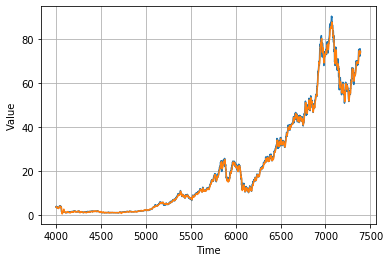

In [38]:
# whole training set graph (prediction)
plot_series(time_train, series_train)
plot_series(time_train, results_train)

(3390, 1)


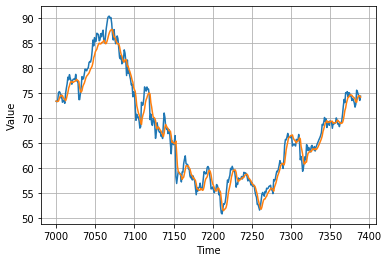

In [39]:
# partial training set graph (prediction)
partial = 3000
print(time_train.shape)
plot_series(time_train[partial:], series_train[partial:])
plot_series(time_train[partial:], results_train[partial:])

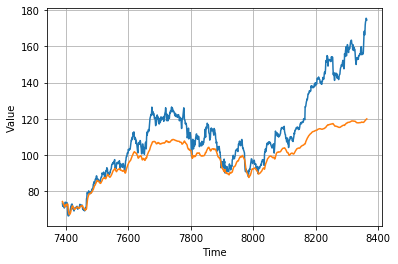

In [40]:
# validation data prediction
plot_series(time_val, series_val)
plot_series(time_val, results_val)

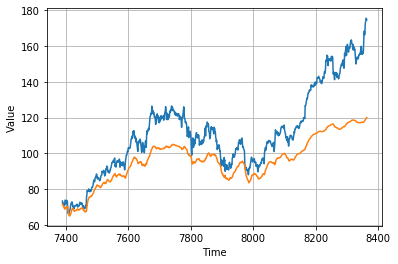

In [20]:
# validation data prediction(to check with previous one)

plot_series(time_val, series_val)
plot_series(time_val, results_val)